<a href="https://colab.research.google.com/github/finddme/MachineLearning/blob/master/KMeans%EC%8B%A4%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#K-Means-|-실습1" data-toc-modified-id="K-Means-|-실습1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>K-Means | 실습1</a></span><ul class="toc-item"><li><span><a href="#K-Means-|-실습1-|-데이터-형성" data-toc-modified-id="K-Means-|-실습1-|-데이터-형성-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>K-Means | 실습1 | 데이터 형성</a></span></li><li><span><a href="#K-Means-|-실습1-|-데이터-시각화" data-toc-modified-id="K-Means-|-실습1-|-데이터-시각화-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>K-Means | 실습1 | 데이터 시각화</a></span></li><li><span><a href="#K-Means-|-실습1-|-K-Means-수행" data-toc-modified-id="K-Means-|-실습1-|-K-Means-수행-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>K-Means | 실습1 | K-Means 수행</a></span></li></ul></li></ul></div>

### K-Means | 실습1

In [ ]:
from sklearn.cluster import KMeans # KMeans 라이브러리를 불러온다.
import numpy as np
import pandas as pd 
import seaborn as sns # 데이터 시각화를 위한 seaborn과 matplotlib을 불러온다.
import matplotlib.pyplot as plt
%matplotlib inline

#### K-Means | 실습1 | 데이터 형성

In [ ]:
# 데이터프레임을 하나 만든다.
df1 = pd.DataFrame(columns=['x','y'], dtype = 'float')
print(df1)

Empty DataFrame
Columns: [x, y]
Index: []


In [ ]:
# 클러스터링을 수행할 데이터를 앞서 만든 데이터프레임에 채워준다.
# 좌표평면 위에 표현할 수 있는 데이터를 넣어준다. x축, y축.
# [x값, y값]
# 총 31개.
df1.loc[0] = [2, 9]
df1.loc[1] = [6, 1]
df1.loc[2] = [29, 30]
df1.loc[3] = [7, 20]
df1.loc[4] = [23, 31]
df1.loc[5] = [36, 23]
df1.loc[6] = [10, 4]
df1.loc[7] = [4, 7]
df1.loc[8] = [8, 23]
df1.loc[9] = [22, 6]
df1.loc[10] = [34, 24]
df1.loc[11] = [21, 37]
df1.loc[12] = [17, 8]
df1.loc[13] = [19, 1]
df1.loc[14] = [35, 34]
df1.loc[15] = [38, 28]
df1.loc[16] = [1, 5]
df1.loc[17] = [16, 22]
df1.loc[18] = [30, 15]
df1.loc[19] = [5, 28]
df1.loc[20] = [18, 3]
df1.loc[21] = [14, 17]
df1.loc[22] = [27, 19]
df1.loc[23] = [39, 14]
df1.loc[24] = [23, 29]
df1.loc[25] = [3, 39]
df1.loc[26] = [9, 27]
df1.loc[27] = [20, 26]
df1.loc[28] = [11, 16]
df1.loc[29] = [14, 6]
df1.loc[30] = [33, 2]

In [ ]:
# head 함수를 사용해서 위에서 데이터를 하나하나 넣은 데이터프레임을 출력해본다.
df1.head(31)

,x,y
0,2.0,9.0
1,6.0,1.0
2,29.0,30.0
3,7.0,20.0
4,23.0,31.0
5,36.0,23.0
6,10.0,4.0
7,4.0,7.0
8,8.0,23.0
9,22.0,6.0


#### K-Means | 실습1 | 데이터 시각화

    - 데이터 프레임을 만들어준 후에는 데이터를 그래프 형태로 보면 좋다. 데이터의 관계성 파악이 용이해진다. 

C:\Users\yein4\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(10.049999999999997, 0.5, 'Y')

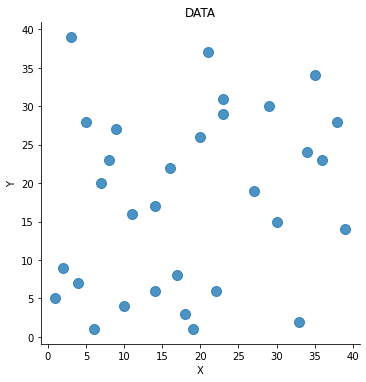

In [ ]:
'''
# 기호의 크기를 넣어줄 때는 scatter_kws매개변수에 대한 값을 딕셔너리 형태로 넣어주면 된다. 
# seaborn라이브러리의 다변량 산점도 그래프를 그릴때 기호 크기 조절을 위해서 
  scatter_kws속성에 딕셔너리값의 key부분에 's'(size)를 넣어주면 된다. 
# 그 다음 value부분에는 크기를 판별할 기준 변수를 넣어주면 된다
# fit_reg옵션으로 회귀선을 제거해줄 수 있다.
'''
# seaborn라이브러리에 있는 함수를 통해 df1데이터의 x와 y에 대해 그래프를 그리겠다고 한다.
sns.lmplot('x','y', data= df1, fit_reg=False, scatter_kws={'s': 100})
plt.title('DATA') # 위 그래프의 제목을 설정해줄 수 있다.
plt.xlabel('X') # x레이블은 X
plt.ylabel('Y') # y레이블은 Y

#### K-Means | 실습1 | K-Means 수행

In [ ]:
# 이제 K-Means를 활용하여 클러스터링을 수행해보겠다.
points1 = df1.values # 연산 수행을 위해 데이터프레임의 값들을 numpy객체로서 초기화해준다.
points1[0:5]

array([[ 2.,  9.],
       [ 6.,  1.],
       [29., 30.],
       [ 7., 20.],
       [23., 31.]])

In [ ]:
# 클러스터는 4개로 하고, ponits라는 데이터에 대해 K-Means를 수행한다.
# K-Means 클러스터링의 초기 군집 중심점 좌표 설정 방식은 K-Means++이 default이다.
kmeans1 = KMeans(n_clusters= 4).fit(points1)
kmeans1.cluster_centers_ # 각 클러스터들의 중심 위치를 뽑아본다.
# 4개의 클러스터 중심값의 위치(좌표)가 출력된다.

array([[33.   , 14.6  ],
       [11.3  ,  5.   ],
       [ 9.125, 24.   ],
       [27.875, 29.875]])

In [ ]:
# kmeans를 수행했으니까 각 데이터들이 속한 클러스터를 확인해보자
# 각 데이터의 인덱스에 해당 데이터의 소속 클러스터가 결과로 나온다.
kmeans1.labels_ 

array([1, 1, 3, 2, 3, 0, 1, 1, 2, 1, 3, 3, 1, 1, 3, 3, 1, 2, 0, 2, 1, 2,
       0, 0, 3, 2, 2, 3, 2, 1, 0])

In [ ]:
# 시각화를 위해 'cluster'라는 이름으로 df1데이터프레임에 각 데이터의 클러스터 결과를 넣어준다.
df1['cluster'] = kmeans1.labels_
df1.head(5)
# 각 데이터들이 어떤 클러스터에 속하는지 출력된다.

,x,y,cluster
0,2.0,9.0,1
1,6.0,1.0,1
2,29.0,30.0,3
3,7.0,20.0,2
4,23.0,31.0,3


C:\Users\yein4\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(10.395989583333332, 0.5, 'Y')

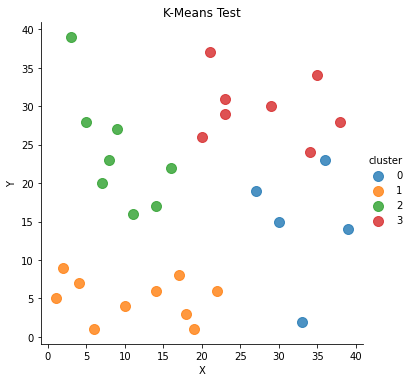

In [ ]:
# cluster속성을 기준으로, df1데이터의 x와 y에 대해 그래프를 그리겠다.
# 즉, 그래프의 색상은 'cluster'를 기준으로 다르게 표현하겠다
sns.lmplot('x', 'y', data= df1, fit_reg= False, scatter_kws={'s':100},hue="cluster")
plt.title('K-Means Test')
plt.xlabel('X')
plt.ylabel('Y')